# Nigerian Music scraped from Spotify - an analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/ShilpaSayuraML/DS-ML-Workshop/main/MS/nigerian-songs.csv'
df = pd.read_csv(url)
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


Get information about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              530 non-null    object 
 1   album             530 non-null    object 
 2   artist            530 non-null    object 
 3   artist_top_genre  530 non-null    object 
 4   release_date      530 non-null    int64  
 5   length            530 non-null    int64  
 6   popularity        530 non-null    int64  
 7   danceability      530 non-null    float64
 8   acousticness      530 non-null    float64
 9   energy            530 non-null    float64
 10  instrumentalness  530 non-null    float64
 11  liveness          530 non-null    float64
 12  loudness          530 non-null    float64
 13  speechiness       530 non-null    float64
 14  tempo             530 non-null    float64
 15  time_signature    530 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory us

Double-check for null values.

In [4]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

Look at the general values of the data. Note that popularity can be '0' - and there are many rows with that value

In [5]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


Let's examine the genres. Quite a few are listed as 'Missing' which means they aren't categorized in the dataset with a genre

Text(0.5, 1.0, 'Top genres')

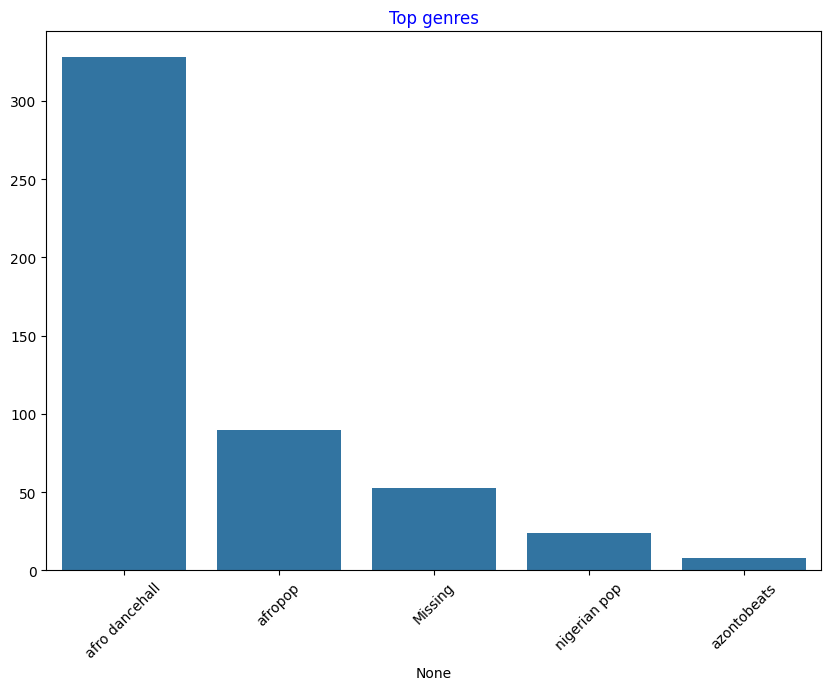

In [6]:
import seaborn as sns

top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Remove 'Missing' genres, as it's not classified in Spotify


Text(0.5, 1.0, 'Top genres')

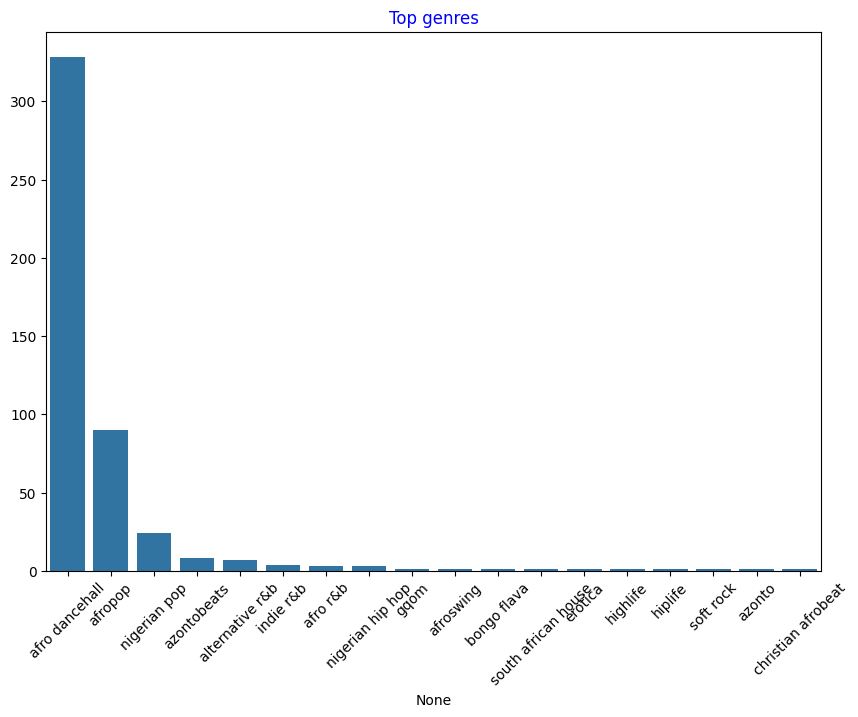

In [7]:
df = df[df['artist_top_genre'] != 'Missing']
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

The top three genres comprise the greatest part of the dataset, so let's focus on those

Text(0.5, 1.0, 'Top genres')

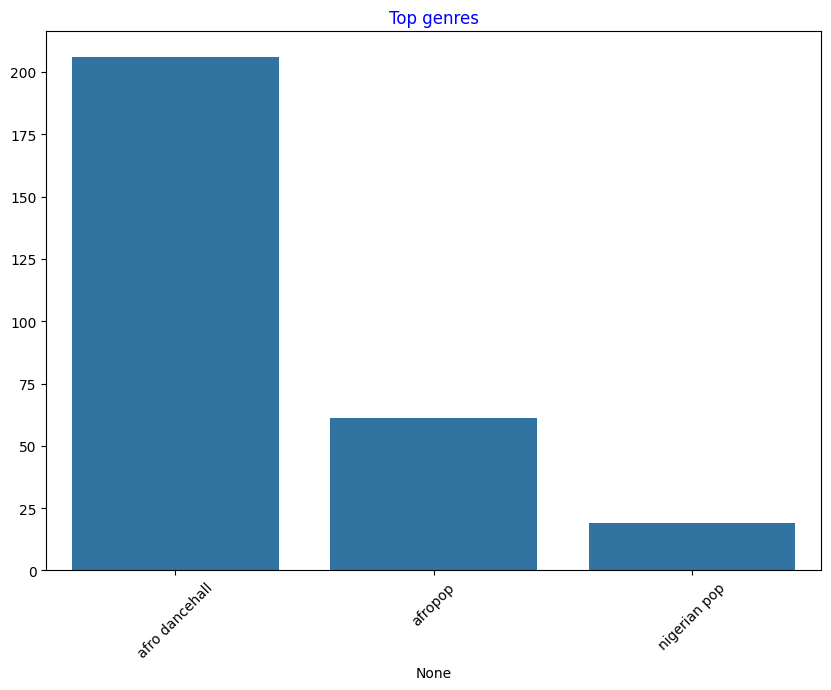

In [8]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

The data is not strongly correlated except between energy and loudness, which makes sense. Popularity has a correspondence to release data, which also makes sense, as more recent songs are probably more popular. Length and energy seem to have a correlation - perhaps shorter songs are more energetic?

<ipython-input-9-a415e0e9dc3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


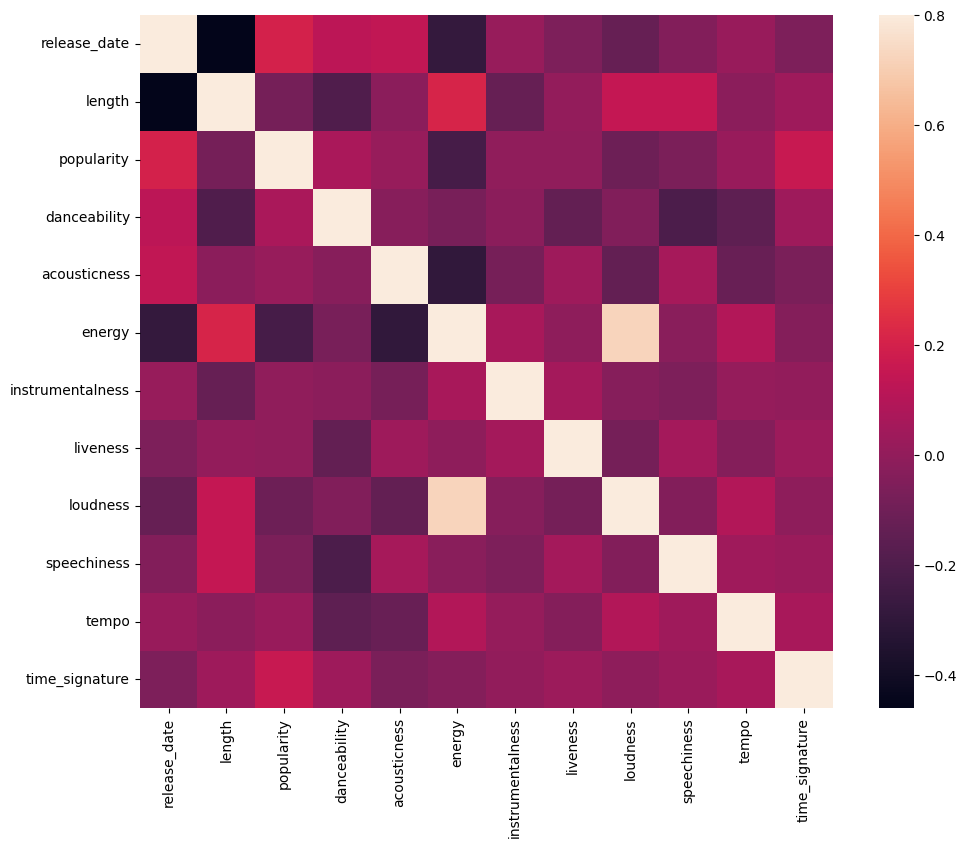

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Are the genres significantly different in the perception of their danceability, based on their popularity? Examine our top three genres data distribution for popularity and danceability along a given x and y axis

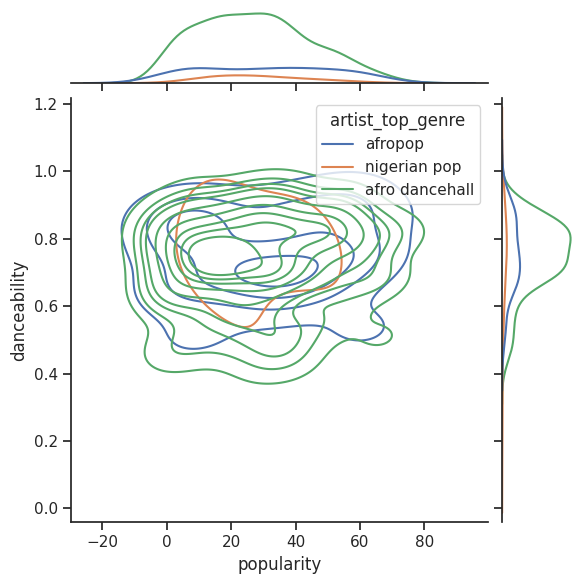

In [10]:
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="popularity", y="danceability", hue="artist_top_genre",
    kind="kde",
)

In general, the three genres align in terms of their popularity and danceability.  A scatterplot of the same axes shows a similar pattern of convergence. Try a scatterplot to check the distribution of data per genre

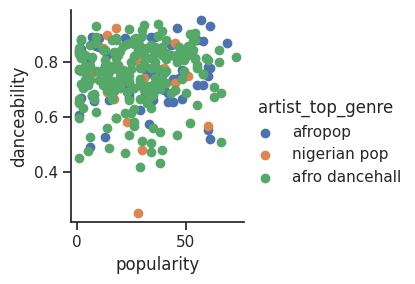

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df, hue="artist_top_genre")
g.map(plt.scatter, "popularity", "danceability")
g.add_legend()
plt.show()


<Axes: xlabel='release_date'>

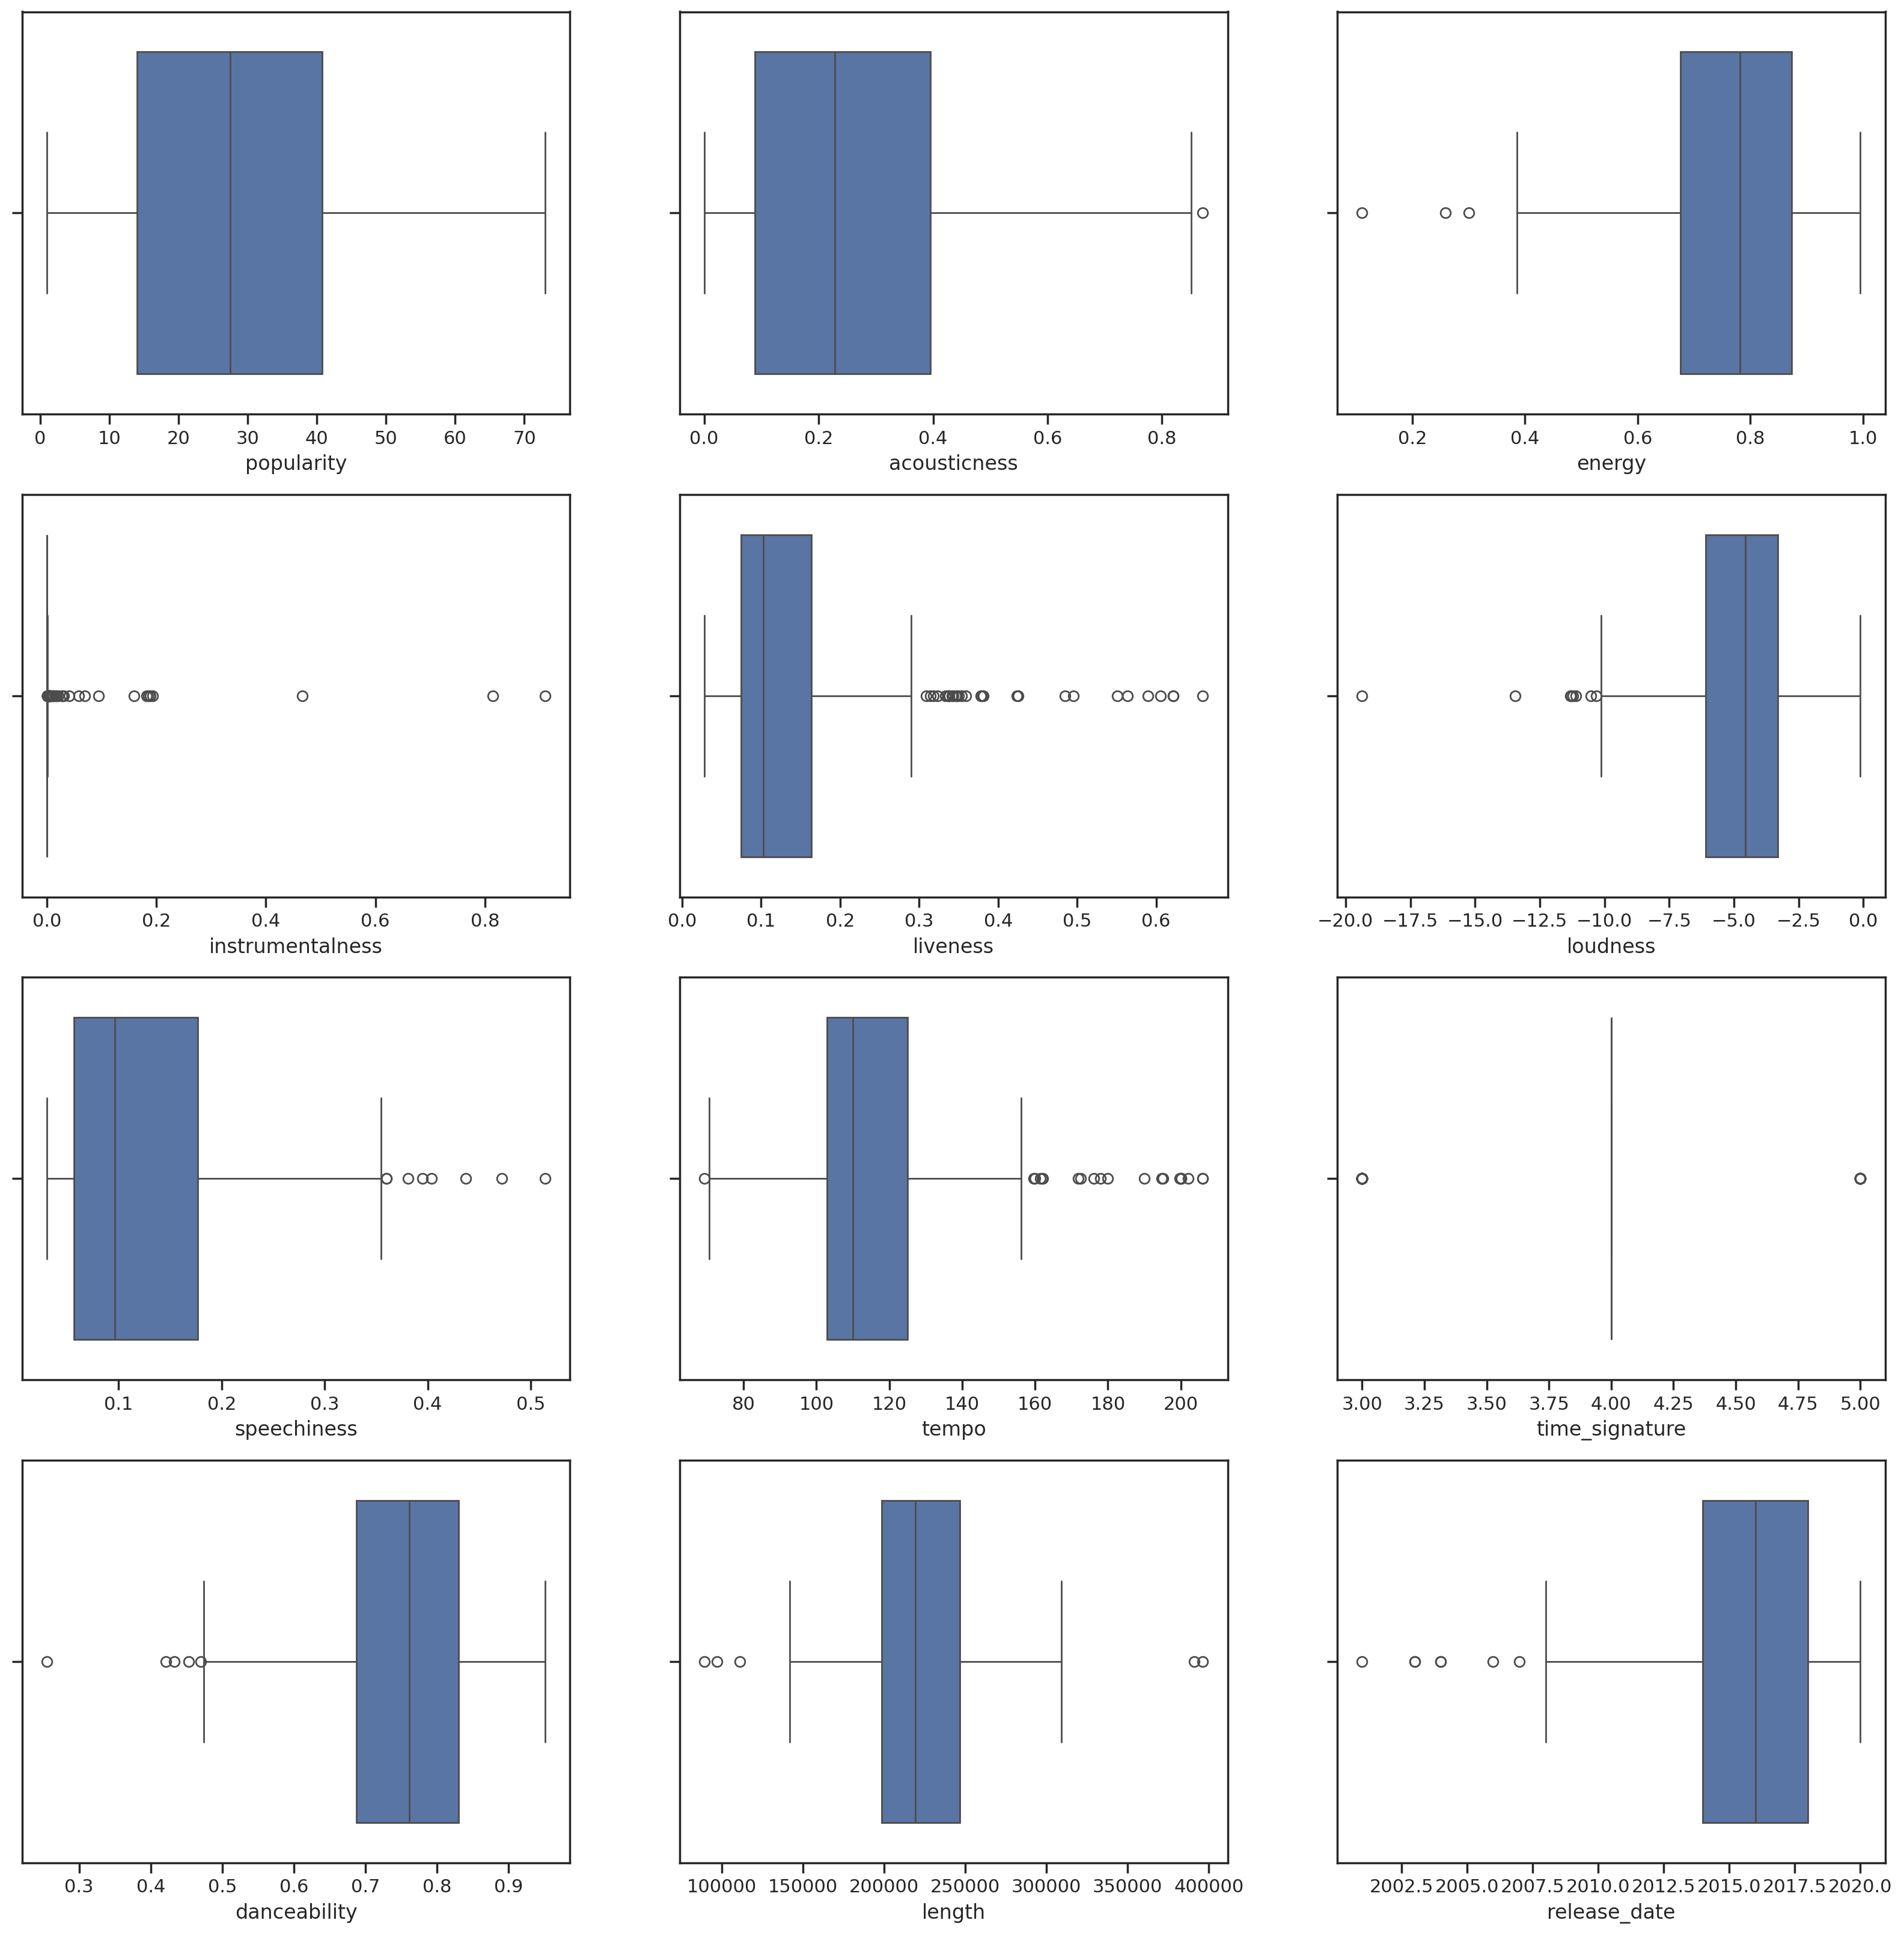

In [16]:
#Check for outliers using box plots
#and focus on on columns with fewer outliers



plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

In [ ]:
# Choose several columns with similar ranges.
#Make sure to include the artist_top_genre column to keep our genres straight.

from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder
le = LabelEncoder()

# Initialize StandardScaler
scaler = StandardScaler()

# Choose columns with similar ranges including artist_top_genre
X = df[['artist_top_genre', 'popularity', 'danceability', 'acousticness', 'loudness', 'energy']]

# Drop rows with missing values
X.dropna(inplace=True)

# Encode artist_top_genre
X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# Scale numerical features
X_scaled = scaler.fit_transform(X.iloc[:, 1:])  # Exclude artist_top_genre from scaling

# Combine encoded genre and scaled features
X_final = pd.concat([X['artist_top_genre'], pd.DataFrame(X_scaled, columns=X.columns[1:])], axis=1)

# Encode target variable
y = le.fit_transform(df['artist_top_genre'])


<ipython-input-19-cdb6d179d255>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
<ipython-input-19-cdb6d179d255>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])


In [20]:
X_final

,artist_top_genre,popularity,danceability,acousticness,loudness,energy
1,1.0,-0.800765,1.324745,2.625895,-0.016548,-1.049536
3,2.0,-0.122860,0.512490,-0.679481,-2.131551,-1.649188
4,1.0,0.046616,0.646378,0.921484,-2.050670,-1.216881
5,2.0,-0.066368,0.557119,1.689946,-2.623092,-3.218043
6,2.0,0.442060,0.896303,-0.250915,-1.209338,-0.645120
...,...,...,...,...,...,...
279,NaN,-1.535161,0.905229,-0.068651,0.471241,1.028326
281,NaN,-0.461812,0.824896,-1.128736,0.499591,1.181725
282,NaN,-0.800765,0.360749,-0.344510,0.287382,0.310138
284,NaN,-0.122860,1.048043,-1.124795,0.746821,0.937681


In [22]:
# Drop rows with missing values
X_final.dropna(inplace=True)
X_final['artist_top_genre'].value_counts()

0.0    114
1.0     37
2.0     12
Name: artist_top_genre, dtype: int64

In [23]:
from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1],
      dtype=int32)

In [24]:
#get a 'silhouette score' to see the accuracy. Our score is in the middle.

from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [25]:
#Import KMeans and build a model

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

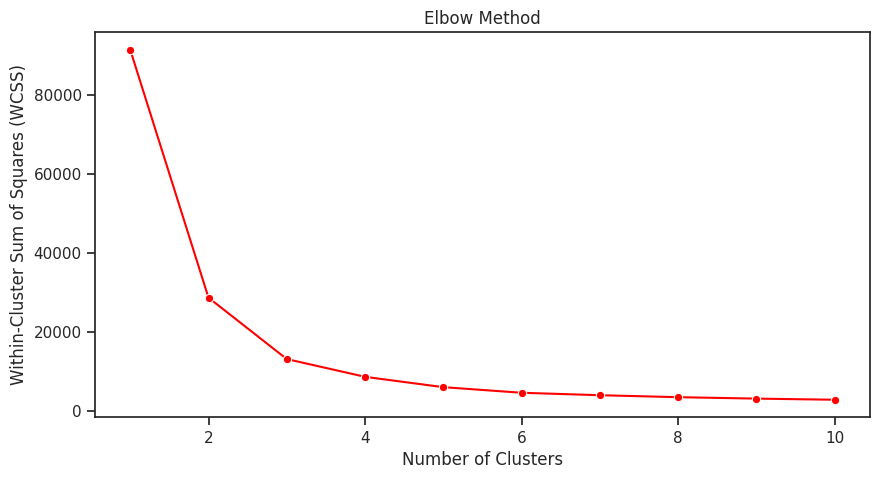

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


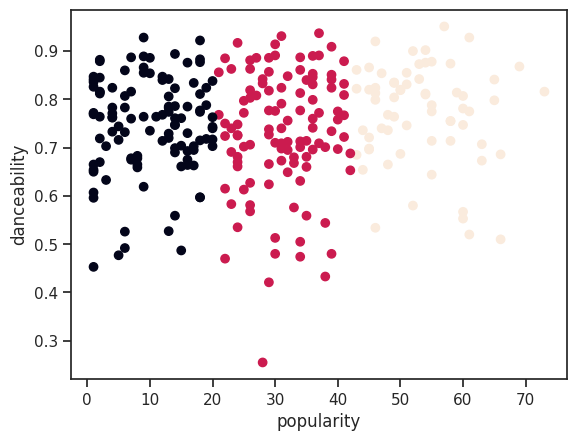

In [29]:
# 3 is a good number
#Fit the model again and create a scatterplot of your clusters.
# They do group in bunches, but they are pretty close together.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

In [31]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a DataFrame to store the results
df_results = pd.DataFrame(data=X, columns=iris.feature_names)
df_results['cluster'] = labels

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Display the first few rows of the results DataFrame
print("\nCluster Assignment for the Iris Dataset:")
print(df_results.head().to_string())


Cluster Centers:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Cluster Assignment for the Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  cluster
0                5.1               3.5                1.4               0.2        1
1                4.9               3.0                1.4               0.2        1
2                4.7               3.2                1.3               0.2        1
3                4.6               3.1                1.5               0.2        1
4                5.0               3.6                1.4               0.2        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


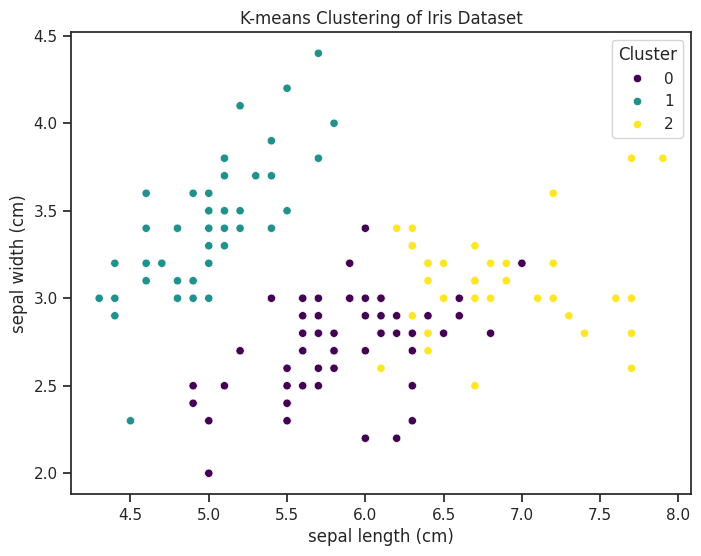

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose two features for visualization, e.g., sepal length and sepal width
feature1 = 0  # index of sepal length
feature2 = 1  # index of sepal width

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results, x=iris.feature_names[feature1], y=iris.feature_names[feature2], hue='cluster', palette='viridis')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[feature1])
plt.ylabel(iris.feature_names[feature2])
plt.legend(title='Cluster')
plt.show()


In [33]:
import numpy as np

# Step 1: Generate random marks for 100 students (assuming marks range from 0 to 100)
np.random.seed(42)  # For reproducibility
marks = np.random.randint(0, 101, 100)

# Step 2: Define grade categories
grade_thresholds = {
    'F': 40,
    'S': 50,
    'C': 65,
    'B': 75,
    'A': 100
}

# Step 3: Assign grades to each student based on their marks
grades = []
for mark in marks:
    for grade, threshold in grade_thresholds.items():
        if mark < threshold:
            grades.append(grade)
            break
    else:
        grades.append('A')  # If mark exceeds 100, assign grade 'A'

# Display the first few marks and grades
for i in range(100):  # Displaying  students
    print(f"Student {i+1}: Mark={marks[i]}, Grade={grades[i]}")


Student 1: Mark=51, Grade=C
Student 2: Mark=92, Grade=A
Student 3: Mark=14, Grade=F
Student 4: Mark=71, Grade=B
Student 5: Mark=60, Grade=C
Student 6: Mark=20, Grade=F
Student 7: Mark=82, Grade=A
Student 8: Mark=86, Grade=A
Student 9: Mark=74, Grade=B
Student 10: Mark=74, Grade=B
Student 11: Mark=87, Grade=A
Student 12: Mark=99, Grade=A
Student 13: Mark=23, Grade=F
Student 14: Mark=2, Grade=F
Student 15: Mark=21, Grade=F
Student 16: Mark=52, Grade=C
Student 17: Mark=1, Grade=F
Student 18: Mark=87, Grade=A
Student 19: Mark=29, Grade=F
Student 20: Mark=37, Grade=F
Student 21: Mark=1, Grade=F
Student 22: Mark=63, Grade=C
Student 23: Mark=59, Grade=C
Student 24: Mark=20, Grade=F
Student 25: Mark=32, Grade=F
Student 26: Mark=75, Grade=A
Student 27: Mark=57, Grade=C
Student 28: Mark=21, Grade=F
Student 29: Mark=88, Grade=A
Student 30: Mark=48, Grade=S
Student 31: Mark=90, Grade=A
Student 32: Mark=58, Grade=C
Student 33: Mark=41, Grade=S
Student 34: Mark=91, Grade=A
Student 35: Mark=59, Grade

In [35]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'Student': range(1, 101),
                   'Mark': marks,
                   'Grade': grades})

# Display the DataFrame
print(df.head())  # Display the first few rows of the DataFrame
print(df['Grade'].value_counts())

   Student  Mark Grade
0        1    51     C
1        2    92     A
2        3    14     F
3        4    71     B
4        5    60     C
F    34
A    27
C    24
S     8
B     7
Name: Grade, dtype: int64


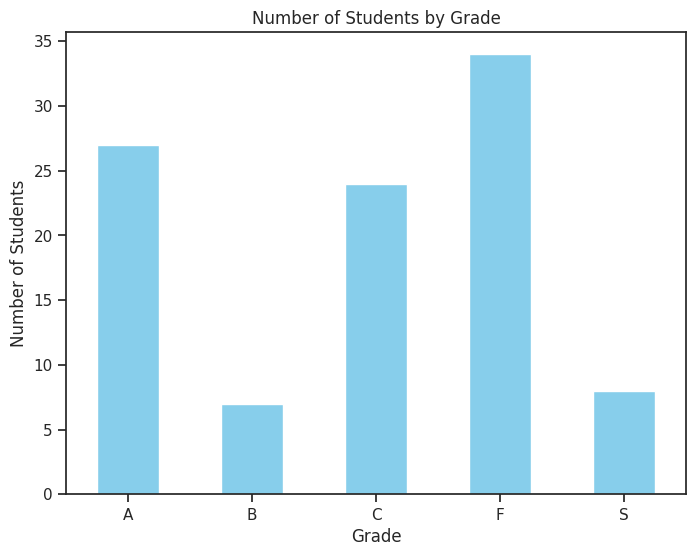

In [36]:
import matplotlib.pyplot as plt

# Count the number of students in each grade
grade_counts = df['Grade'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Students by Grade')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


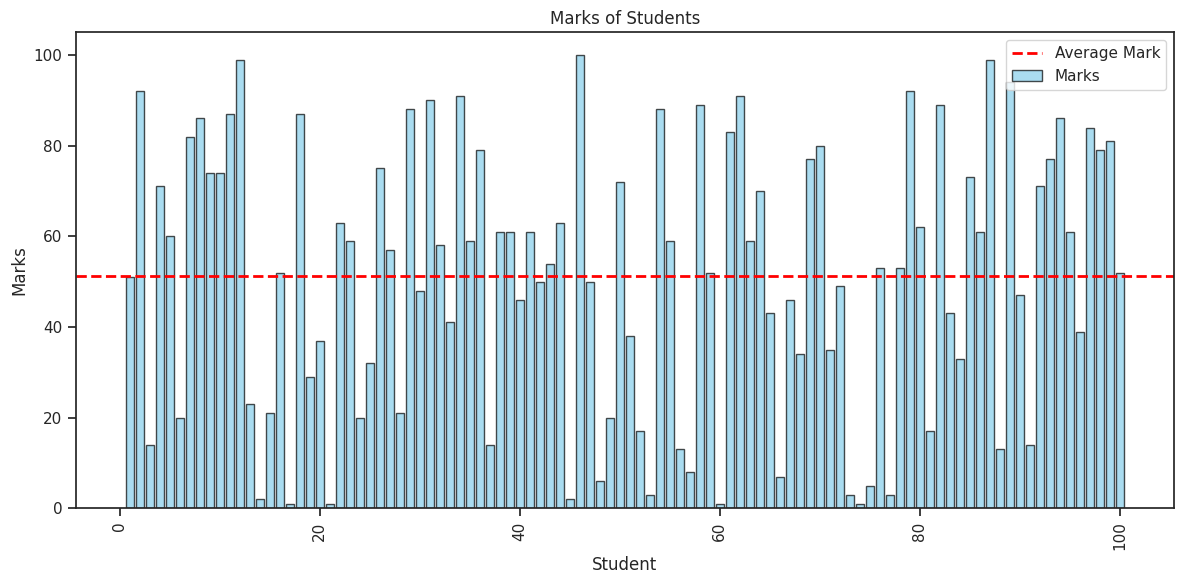

In [38]:
import matplotlib.pyplot as plt

# Plot the marks for each student
plt.figure(figsize=(12, 6))
plt.bar(df['Student'], df['Mark'], color='skyblue', edgecolor='black', alpha=0.7, label='Marks')

# Draw a line for the average mark
plt.axhline(y=average_mark, color='red', linestyle='--', linewidth=2, label='Average Mark')

# Add labels and title
plt.title('Marks of Students')
plt.xlabel('Student')
plt.ylabel('Marks')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


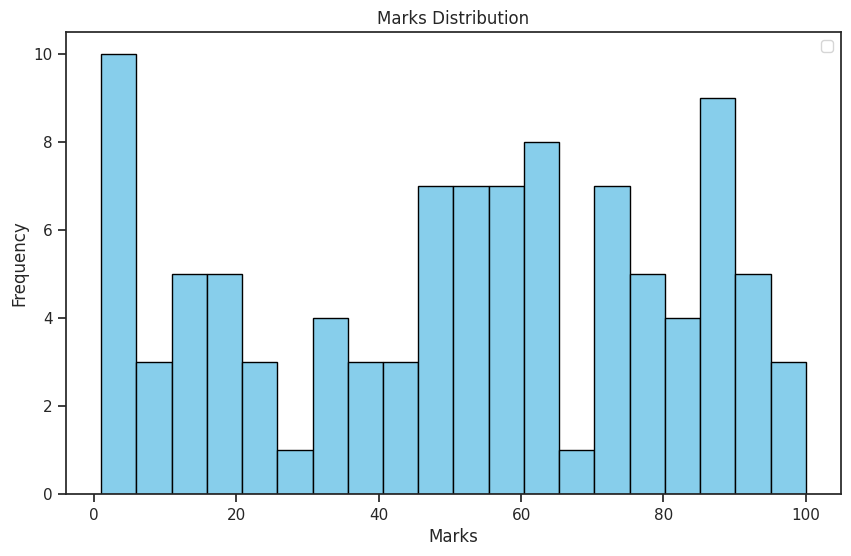

In [39]:
import matplotlib.pyplot as plt

# Calculate average marks
average_mark = df['Mark'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.hist(df['Mark'], bins=20, color='skyblue', edgecolor='black')

plt.title('Marks Distribution')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


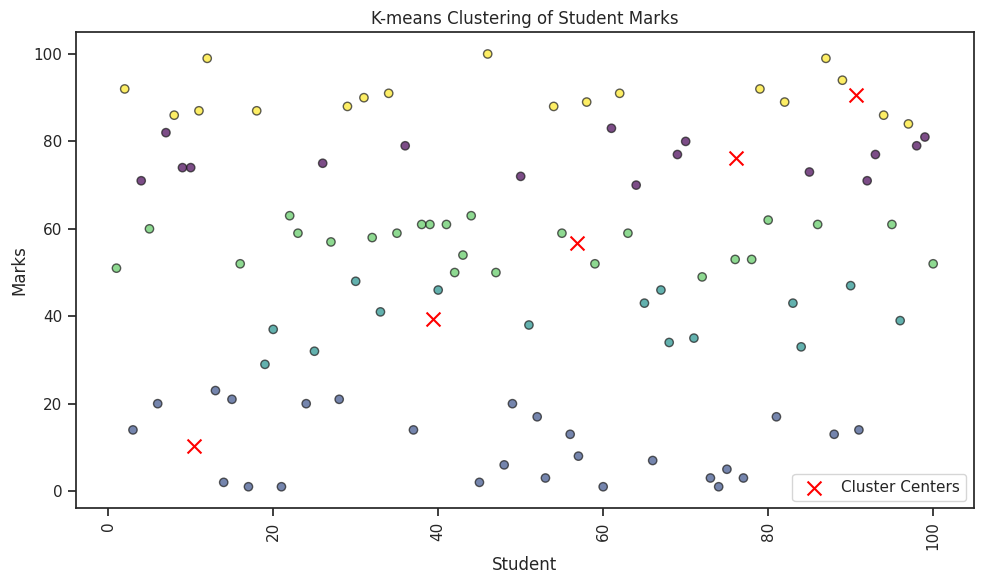

In [42]:
from sklearn.cluster import KMeans

# Reshape the marks array to fit the KMeans input format
marks_reshaped = df['Mark'].values.reshape(-1, 1)

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the data
kmeans.fit(marks_reshaped)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Student'], df['Mark'], c=cluster_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.scatter(cluster_centers, cluster_centers, marker='x', color='red', s=100, label='Cluster Centers')
plt.title('K-means Clustering of Student Marks')
plt.xlabel('Student')
plt.ylabel('Marks')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [45]:
cluster_centers

array([[76.125     ],
       [10.38461538],
       [39.4       ],
       [56.8       ],
       [90.66666667]])

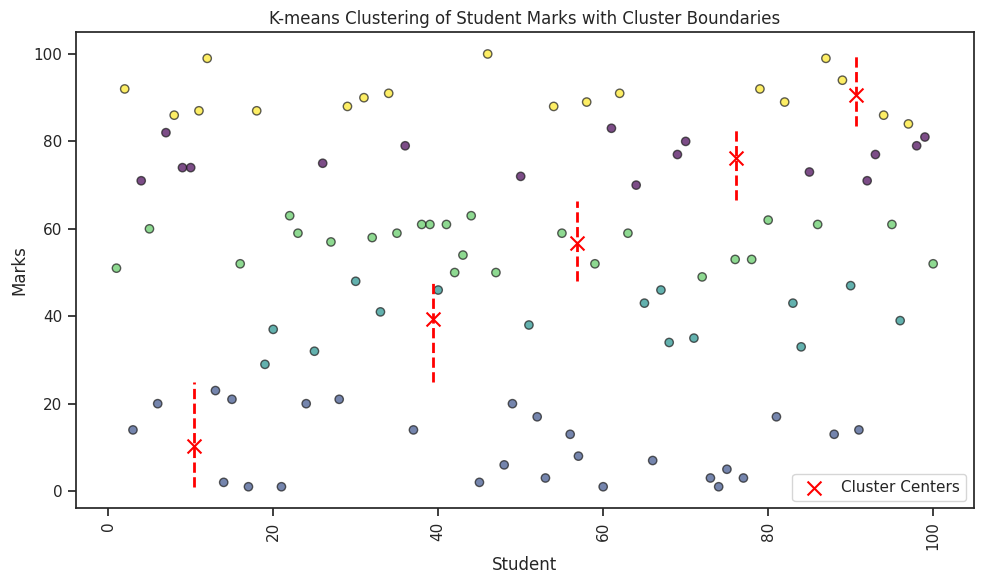

In [43]:
import numpy as np

# Generate a range of marks to cover the entire range of student marks
marks_range = np.linspace(df['Mark'].min(), df['Mark'].max(), 1000).reshape(-1, 1)

# Predict cluster labels for the marks range
cluster_labels_range = kmeans.predict(marks_range)

# Plot the clusters along with cluster boundaries
plt.figure(figsize=(10, 6))
plt.scatter(df['Student'], df['Mark'], c=cluster_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.scatter(cluster_centers, cluster_centers, marker='x', color='red', s=100, label='Cluster Centers')

# Plot cluster boundaries
for cluster_label in np.unique(cluster_labels):
    cluster_center = cluster_centers[cluster_label]
    cluster_marks_range = marks_range[cluster_labels_range == cluster_label]
    plt.plot(np.full_like(cluster_marks_range, cluster_center), cluster_marks_range, color='red', linestyle='--', linewidth=2)

plt.title('K-means Clustering of Student Marks with Cluster Boundaries')
plt.xlabel('Student')
plt.ylabel('Marks')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


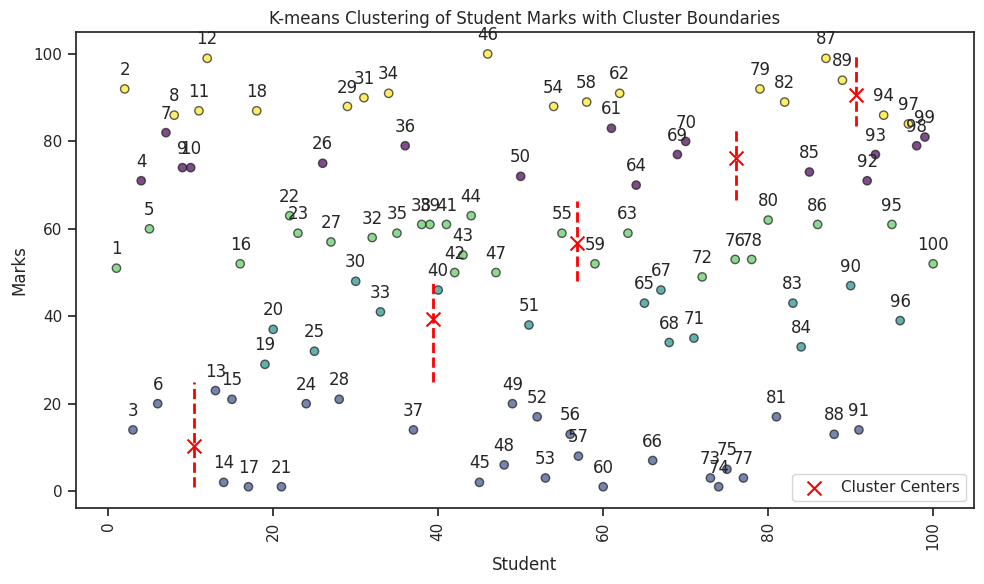

In [44]:
# Plot the clusters along with cluster boundaries
plt.figure(figsize=(10, 6))
plt.scatter(df['Student'], df['Mark'], c=cluster_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.scatter(cluster_centers, cluster_centers, marker='x', color='red', s=100, label='Cluster Centers')

# Plot cluster boundaries
for cluster_label in np.unique(cluster_labels):
    cluster_center = cluster_centers[cluster_label]
    cluster_marks_range = marks_range[cluster_labels_range == cluster_label]
    plt.plot(np.full_like(cluster_marks_range, cluster_center), cluster_marks_range, color='red', linestyle='--', linewidth=2)

# Annotate points with student number
for i, student in enumerate(df['Student']):
    plt.annotate(student, (df['Student'].iloc[i], df['Mark'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('K-means Clustering of Student Marks with Cluster Boundaries')
plt.xlabel('Student')
plt.ylabel('Marks')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
